# **Exploratory Data Analysis (EDA)**

## Objectives

This notebook aims to use **Exploratory Data Analysis (EDA)** to explore, and understand the dataset and its existing patterns and trends. The EDA process aims to:
- Conduct descriptive analysis of the data
- Generate and refine features in features engineering
- Test hypothesis using statistical tests
- Generate visualisation to display trends
- Gather insights on data that answers business requirements


## Prerequisites
- Python 3.12.8 is installed
- Required Python Libaries from `requirements.txt` and their dependencies must be installed
- Optional to set up Python virtual enviornment
- Completed ETL step

## Inputs

- Cleaned dataset from ETL `cleaned_heart_data.csv`.

## Initial hypothesis
- Older individuals are more likely to develope cardiovascular disease (CVD)
- Males are more likely to develope CVD than females
- High blood pressure increase the likelihood of developing CDV
- High cholesterol individuals are more likely to have CDV
- Physically active individuals are less likely to have CDV
- Smokers are more likely to have CDV
- Alcohol consumption increase the likelyhood of developing CDV

## Outputs

- Generated insights and tested hypothesis
- Data visualisations created using matplotlib, seaborn and plotly
- Processed Dataset

---

# Change working directory

The working directory must be changed from its current folder to its parent folder
* The current directory can be accessed with `os.getcwd()`

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/analysis-of-risk-factors-for-cardiovascular-diseases/jupyter_notebooks'

The parent of the current directory will be the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/analysis-of-risk-factors-for-cardiovascular-diseases'

---

# Initial Setup

### Import Libaries

Essential data analysis and visualisation libaries are imported.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Extract Dataset

Extract the cleaned csv file as a pandas DataFrame

In [5]:
'''Read the raw data and create a copy of the original data'''
df = pd.read_csv('data/cleaned/cleaned_heart_data.csv') # Cleaned data directory
df_original =df.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


---

# EDA: Features Engineering and Descriptive Analysis

## Data type conversion
A basic summary of the DataFrame is generated using `.info()`. Although the data types of categorical data were changed in the previous ETL notebooks, they have reverted back to integer data types. This is because the actural values of those rows were not replaced, so when the saved csv file is read, it gets assigned to an integer data type.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68768 entries, 0 to 68767
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68768 non-null  int64  
 1   age          68768 non-null  int64  
 2   gender       68768 non-null  int64  
 3   height       68768 non-null  int64  
 4   weight       68768 non-null  float64
 5   ap_hi        68768 non-null  int64  
 6   ap_lo        68768 non-null  int64  
 7   cholesterol  68768 non-null  int64  
 8   gluc         68768 non-null  int64  
 9   smoke        68768 non-null  int64  
 10  alco         68768 non-null  int64  
 11  active       68768 non-null  int64  
 12  cardio       68768 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.8 MB


The integer values of `gender`, `cholesterol`, `gluc`, smoke, alco, active and cardio are replaced with string variables representing the same thing. The rows are then converted to category data types.

In [7]:
'''Replace integer values with descriptive names and convert to category data type'''#
catago_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

df['gender'].replace({1: 'Male', 2: 'Female'}, inplace=True)
df['cholesterol'].replace({1: 'Normal', 2: 'High', 3: 'Very high'}, inplace=True)
df['gluc'].replace({1: 'Normal', 2: 'High', 3: 'Very high'}, inplace=True)
df['smoke'].replace({0: 'Non-smoker', 1: 'Smoker'}, inplace=True)
df['alco'].replace({0: 'Non-drinker', 1: 'Drinker'}, inplace=True)
df['active'].replace({0: 'Inactive', 1: 'Active'}, inplace=True)
df['cardio'].replace({0: 'No CVD', 1: 'CVD'}, inplace=True)

for col in catago_cols:
    df[col] = df[col].astype('category')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Female,168,62.0,110,80,Normal,Normal,Non-smoker,Non-drinker,Active,No CVD
1,1,20228,Male,156,85.0,140,90,Very high,Normal,Non-smoker,Non-drinker,Active,CVD
2,2,18857,Male,165,64.0,130,70,Very high,Normal,Non-smoker,Non-drinker,Inactive,CVD
3,3,17623,Female,169,82.0,150,100,Normal,Normal,Non-smoker,Non-drinker,Active,CVD
4,4,17474,Male,156,56.0,100,60,Normal,Normal,Non-smoker,Non-drinker,Inactive,No CVD


Confirm that the data types have been changed to category

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68768 entries, 0 to 68767
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           68768 non-null  int64   
 1   age          68768 non-null  int64   
 2   gender       68768 non-null  category
 3   height       68768 non-null  int64   
 4   weight       68768 non-null  float64 
 5   ap_hi        68768 non-null  int64   
 6   ap_lo        68768 non-null  int64   
 7   cholesterol  68768 non-null  category
 8   gluc         68768 non-null  category
 9   smoke        68768 non-null  category
 10  alco         68768 non-null  category
 11  active       68768 non-null  category
 12  cardio       68768 non-null  category
dtypes: category(7), float64(1), int64(5)
memory usage: 3.6 MB


## Feature creation

Pulse pressure, body mass index and age in years were created.

In [9]:
'''Create new features: pulse pressure (pp), body mass index (bmi), age in years (age_years)'''
df['pp'] = df['ap_hi'] - df['ap_lo']
df['bmi'] = (df['weight'] / (df['height']/100)**2).round(2)
df["age_years"] = (df["age"] / 365.25).round().astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,age_years
0,0,18393,Female,168,62.0,110,80,Normal,Normal,Non-smoker,Non-drinker,Active,No CVD,30,21.97,50
1,1,20228,Male,156,85.0,140,90,Very high,Normal,Non-smoker,Non-drinker,Active,CVD,50,34.93,55
2,2,18857,Male,165,64.0,130,70,Very high,Normal,Non-smoker,Non-drinker,Inactive,CVD,60,23.51,52
3,3,17623,Female,169,82.0,150,100,Normal,Normal,Non-smoker,Non-drinker,Active,CVD,50,28.71,48
4,4,17474,Male,156,56.0,100,60,Normal,Normal,Non-smoker,Non-drinker,Inactive,No CVD,40,23.01,48


Updated Features Description

|Name of feature|Description|Data type|
| ----------- | ----------- | ----------- |
|`id`|Unique identifier assigned to each person|Integer|
|`age`|Age of the person in days|Integer|
|`gender`|Gender of the person|Category|
|`height`|Height of the person in cm|Integer|
|`weight`|Weight of the person in kg|Float|
|`ap_hi`|Systolic blood pressure reading|Integer|
|`ap_lo`|Diastolic blood pressure reading|Integer|
|`cholesterol`|Cholesterol level|Category|
|`gluc`|Glucose level|Category|
|`smoke`|Smoking status|Category|
|`alco`|Alcohol status|Category|
|`active`|Physical activity status|Category|
|`cardio`|Presence of cardiovascular disease|Category|
|`pp`|Pulse pressure|Integer|
|`bmi`|Body Mass Index in kg/m²|Float|
|`age_years`|Age of the person in years|Integer|


## Identifying and handling outliers
Basic distribution of numerical values can be found using `.describe()`. This will be done to the columns with numerical data values. The age demographic of the data consists of adults between 30 to 65 years old.

The descriptive statistics indicate the presence of outliers and errors: 
- Minimum height and weight of 55 cm and 11 kg is implausible considering that the youngest individual in the dataset is 29 years old (10,798 days).
- pulse pressure (pp) can not be negative as Systolic pressure can not be lower than Diastolic pressure. A typical range is 30–60 mmHg but pulse pressure higher than 100 mmHg is possible in individuals with medical conditions.
- Lowest BMI is 3.47 kg/m² which is very likely an error as lowest ever recorded BMI is 6.7 kg/m².
- Highest BMI is 298.67 kg/m² which also seems unlikely.

In [10]:
'''Get a statistical summary of the numerical columns'''
def stat_summary(dataframe):
    desc = dataframe.describe().T
    desc['range'] = desc['max'] - desc['min']
    desc['var'] = dataframe.var()
    desc['skew'] = dataframe.skew()
    desc['kurtosis'] = dataframe.kurtosis()
    cols = ['min', 'max', 'range', 'mean', '50%', 'std', 'var', 'skew', 'kurtosis']
    return desc[cols].round(2)
stat_summary(df.select_dtypes(exclude='category'))

,min,max,range,mean,50%,std,var,skew,kurtosis
id,0.00,99999.00,99999.0,49969.66,50007.50,28844.51,8.320056e+08,-0.00,-1.20
age,10798.00,23713.00,12915.0,19464.34,19701.00,2468.21,6.092059e+06,-0.31,-0.83
height,55.00,250.00,195.0,164.36,165.00,8.18,6.699000e+01,-0.61,7.59
weight,11.00,200.00,189.0,74.12,72.00,14.33,2.054000e+02,1.01,2.56
ap_hi,60.00,240.00,180.0,126.61,120.00,16.75,2.804500e+02,0.90,1.83
ap_lo,30.00,150.00,120.0,81.35,80.00,9.57,9.154000e+01,0.43,2.24
pp,-60.00,140.00,200.0,45.26,40.00,12.08,1.459400e+02,0.73,6.49
bmi,3.47,298.67,295.2,27.52,26.35,6.05,3.661000e+01,7.79,227.24
age_years,30.00,65.00,35.0,53.29,54.00,6.76,4.574000e+01,-0.31,-0.82


There are 86 entries with negative pulse pressure values. Since these results are impossible, they will be removed from the dataset.

In [11]:
df[df['pp'] < 0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,age_years
468,681,19099,Male,156,65.0,120,150,High,Normal,Non-smoker,Non-drinker,Active,No CVD,-30,26.71,52
627,913,20457,Female,169,68.0,70,110,Normal,Normal,Non-smoker,Non-drinker,Active,No CVD,-40,23.81,56
2341,3356,23361,Male,154,102.0,90,150,Normal,Normal,Non-smoker,Non-drinker,Inactive,CVD,-60,43.01,64
2930,4214,21957,Female,182,90.0,80,140,Very high,Very high,Non-smoker,Non-drinker,Active,CVD,-60,27.17,60
3382,4880,19992,Female,180,80.0,80,125,Very high,Very high,Smoker,Drinker,Active,CVD,-45,24.69,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64604,93855,14375,Male,165,65.0,80,120,Normal,Normal,Non-smoker,Non-drinker,Active,No CVD,-40,23.88,39
65491,95164,19498,Female,160,81.0,80,120,Very high,Very high,Smoker,Drinker,Active,CVD,-40,31.64,53
66235,96271,23424,Male,153,74.0,80,130,Normal,Normal,Non-smoker,Non-drinker,Active,CVD,-50,31.61,64
66284,96339,21193,Female,172,57.0,80,120,Normal,Normal,Smoker,Non-drinker,Active,CVD,-40,19.27,58


Pulse pressure of 0 is impossible, and any pulse pressure below 10 is implausable. A pulse pressure of less than 25 mmHg is already considered to be dangerously low and requires medical evaluation.

In [12]:
df[df['pp']<10]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,age_years
468,681,19099,Male,156,65.0,120,150,High,Normal,Non-smoker,Non-drinker,Active,No CVD,-30,26.71,52
627,913,20457,Female,169,68.0,70,110,Normal,Normal,Non-smoker,Non-drinker,Active,No CVD,-40,23.81,56
2341,3356,23361,Male,154,102.0,90,150,Normal,Normal,Non-smoker,Non-drinker,Inactive,CVD,-60,43.01,64
2930,4214,21957,Female,182,90.0,80,140,Very high,Very high,Non-smoker,Non-drinker,Active,CVD,-60,27.17,60
3382,4880,19992,Female,180,80.0,80,125,Very high,Very high,Smoker,Drinker,Active,CVD,-45,24.69,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64604,93855,14375,Male,165,65.0,80,120,Normal,Normal,Non-smoker,Non-drinker,Active,No CVD,-40,23.88,39
65491,95164,19498,Female,160,81.0,80,120,Very high,Very high,Smoker,Drinker,Active,CVD,-40,31.64,53
66235,96271,23424,Male,153,74.0,80,130,Normal,Normal,Non-smoker,Non-drinker,Active,CVD,-50,31.61,64
66284,96339,21193,Female,172,57.0,80,120,Normal,Normal,Smoker,Non-drinker,Active,CVD,-40,19.27,58


In [13]:
'''Removing entries with negative pulse pressure values and implausibly low pulse pressure values'''
df = df[df['pp'] >= 10]
df.shape

(68678, 16)

The extremely low BMI Values are likely due to incorrect weight measurements. Its unrealistic for adults to have weights of below 30 kg, especially considering the height of the entries. 

In [14]:
df[df['bmi']<10]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,age_years
26331,38312,23284,Male,157,23.0,110,80,Normal,Normal,Non-smoker,Non-drinker,Active,No CVD,30,9.33,64
28967,42156,20408,Female,177,22.0,120,80,Normal,Normal,Smoker,Drinker,Active,No CVD,40,7.02,56
33222,48318,21582,Female,178,11.0,130,90,Normal,Normal,Non-smoker,Non-drinker,Active,CVD,40,3.47,59
59138,85931,21855,Male,162,21.0,120,80,High,Normal,Non-smoker,Non-drinker,Active,CVD,40,8.00,60
59636,86650,18875,Male,171,29.0,110,70,High,Normal,Non-smoker,Non-drinker,Active,CVD,40,9.92,52


A BMI above 40 kg/m² is classified as [class III (severe) obesity](https://www.nhs.uk/conditions/obesity/). Values exceeding 60 kg/m² are more likely the result of data entry errors rather than genuine outliers. Upon inspecting these abnormally high BMI values, many entries have heights below 100 cm, which is highly unlikely for adults, even for individuals with restricted growth conditions. This further supports the idea that the high BMI values are likely caused by incorrect height or weight measurements and should be removed.

In [15]:
'''Inspecting extremely high BMI values'''
df[df['bmi']>60].sort_values(by='bmi')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,age_years
38846,56496,14606,Male,108,70.0,140,90,Normal,Normal,Non-smoker,Non-drinker,Active,CVD,50,60.01,40
63520,92301,21705,Male,169,172.0,120,70,High,Normal,Non-smoker,Non-drinker,Active,No CVD,50,60.22,59
14418,20970,21135,Male,159,153.0,120,80,Normal,Normal,Non-smoker,Non-drinker,Active,CVD,40,60.52,58
41704,60631,19450,Male,160,155.0,120,80,Normal,Normal,Non-smoker,Non-drinker,Active,CVD,40,60.55,53
41116,59768,20464,Male,164,164.0,140,90,Very high,Very high,Non-smoker,Non-drinker,Active,CVD,50,60.98,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28639,41661,19088,Male,60,69.0,110,70,Normal,Normal,Non-smoker,Non-drinker,Inactive,No CVD,40,191.67,52
23492,34186,19074,Male,81,156.0,140,90,Normal,Normal,Non-smoker,Non-drinker,Active,No CVD,50,237.77,52
22321,32456,23386,Male,55,81.0,130,90,Normal,Normal,Non-smoker,Non-drinker,Active,CVD,40,267.77,64
26900,39156,15292,Male,80,178.0,140,90,Very high,Very high,Non-smoker,Non-drinker,Active,CVD,50,278.12,42


To maintain data quality, BMI values were limited to the range 10–60. This removes implausible entries likely due to data errors while preserving plausible extreme values. Values beyond this range are unrealistic for adults aged 30–65.

In [16]:
'''Removing BMI outliers'''
df = df[(df['bmi'] <= 60) & (df['bmi'] >= 10)]
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,age_years
0,0,18393,Female,168,62.0,110,80,Normal,Normal,Non-smoker,Non-drinker,Active,No CVD,30,21.97,50
1,1,20228,Male,156,85.0,140,90,Very high,Normal,Non-smoker,Non-drinker,Active,CVD,50,34.93,55
2,2,18857,Male,165,64.0,130,70,Very high,Normal,Non-smoker,Non-drinker,Inactive,CVD,60,23.51,52
3,3,17623,Female,169,82.0,150,100,Normal,Normal,Non-smoker,Non-drinker,Active,CVD,50,28.71,48
4,4,17474,Male,156,56.0,100,60,Normal,Normal,Non-smoker,Non-drinker,Inactive,No CVD,40,23.01,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68763,99993,19240,Female,168,76.0,120,80,Normal,Normal,Smoker,Non-drinker,Active,No CVD,40,26.93,53
68764,99995,22601,Male,158,126.0,140,90,High,High,Non-smoker,Non-drinker,Active,CVD,50,50.47,62
68765,99996,19066,Female,183,105.0,180,90,Very high,Normal,Non-smoker,Drinker,Inactive,CVD,90,31.35,52
68766,99998,22431,Male,163,72.0,135,80,Normal,High,Non-smoker,Non-drinker,Inactive,CVD,55,27.10,61


Whilst heights of below 130 cm seems unlikely in adults, it is plausable for thoses with [restricted growth conditions](https://www.nhs.uk/conditions/restricted-growth/). Therefore these entries will be kept. 

In [17]:
'''Inspecting extremely low height values'''
(df[df['height']<130]
 .select_dtypes(exclude='category')
 .describe()
 .round(2)
 )

,id,age,height,weight,ap_hi,ap_lo,pp,bmi,age_years
count,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00
mean,57050.67,18853.70,118.24,72.70,120.65,77.39,43.26,52.27,51.54
std,29288.79,2607.13,5.13,11.98,9.04,7.13,6.34,8.95,7.11
min,5278.00,14445.00,100.00,28.00,100.00,60.00,40.00,17.09,40.00
25%,33591.50,17071.75,120.00,70.00,120.00,70.00,40.00,54.52,46.50
50%,64626.00,18976.00,120.00,80.00,120.00,80.00,40.00,55.56,52.00
75%,82360.75,20693.75,120.00,80.00,120.00,80.00,40.00,55.56,56.75
max,98630.00,23422.00,128.00,80.00,150.00,90.00,60.00,60.00,64.00


Load Transformed Data

In [18]:
'''Save dataframe as CSV'''
df.to_csv('data/processed/processed_heart_data.csv', index=False)

## Descriptive Analysis

A statistical summary of the numerical features shows that most variables have acceptable skew and kurtosis values. Pulse pressure, however, shows a slightly high kurtosis, suggesting some outliers still present.

In [19]:
'''Statistical summary of numerical values after outlier removal'''
stat_summary(df.select_dtypes(exclude='category'))

,min,max,range,mean,50%,std,var,skew,kurtosis
id,0.00,99999.0,99999.00,49975.68,50016.50,28844.58,8.320096e+08,-0.00,-1.20
age,10798.00,23713.0,12915.00,19464.32,19701.00,2468.13,6.091687e+06,-0.31,-0.83
height,100.00,250.0,150.00,164.41,165.00,7.94,6.306000e+01,0.00,1.06
weight,28.00,200.0,172.00,74.09,72.00,14.21,2.020200e+02,0.94,2.04
ap_hi,60.00,240.0,180.00,126.67,120.00,16.68,2.780900e+02,0.93,1.83
ap_lo,30.00,150.0,120.00,81.29,80.00,9.43,8.901000e+01,0.30,1.64
pp,10.00,140.0,130.00,45.37,40.00,11.67,1.362300e+02,1.32,3.59
bmi,10.73,60.0,49.27,27.45,26.35,5.21,2.716000e+01,1.19,2.43
age_years,30.00,65.0,35.00,53.29,54.00,6.76,4.573000e+01,-0.31,-0.82


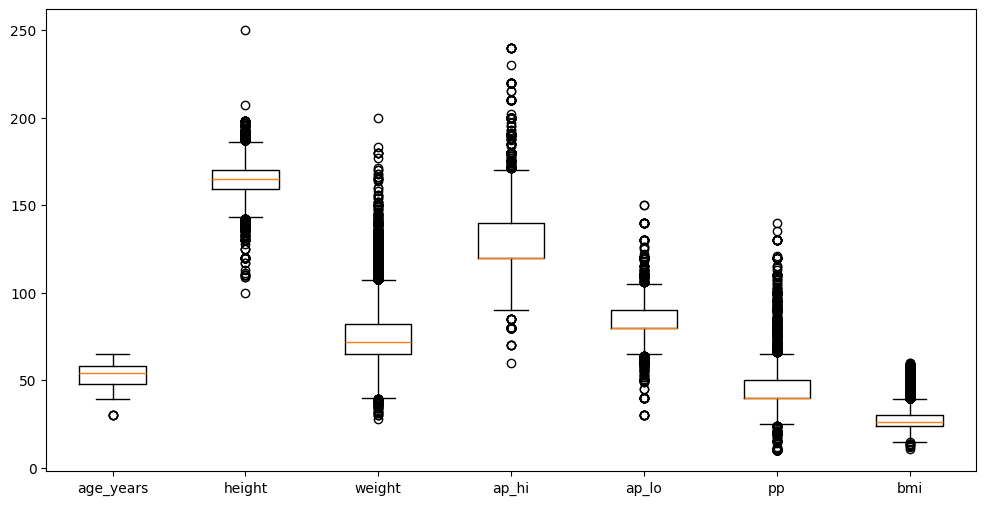

In [20]:
''' Plot boxplots for numerical features to visualize distributions'''
numeric_cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'pp', 'bmi']
list_of_data = []
plt.figure(figsize=(12,6))
for col in numeric_cols:
  list_of_data.append(df[col])

plt.boxplot(x=list_of_data)
plt.xticks(np.arange(1,len(numeric_cols)+1), numeric_cols)
plt.show()

In [21]:
'''Get the distribution of categorical columns and put into a dataframe'''
stats = []
for col in df.select_dtypes(include='category').columns:
    counts = df[col].value_counts()
    percents = df[col].value_counts(normalize=True)* 100
    stat = pd.DataFrame({
        'col': col,
        'value': counts.index, 
        'count': counts.values, 
        'percent': percents.round(2)
        })
    stats.append(stat)

catago_stats = pd.concat(stats).reset_index(drop=True)
catago_stats

,col,value,count,percent
0,gender,Male,44686,65.13
1,gender,Female,23926,34.87
2,cholesterol,Normal,51451,74.99
3,cholesterol,High,9296,13.55
4,cholesterol,Very high,7865,11.46
5,gluc,Normal,58336,85.02
6,gluc,Very high,5212,7.60
7,gluc,High,5064,7.38
8,smoke,Non-smoker,62577,91.20
9,smoke,Smoker,6035,8.80


A brief description of the population of the dataset and its characteristics after removing outliers:
- Total of 68612 individuals
- Population has more males (65.1%) than females (34.9%)
- ≈75% have normal cholesterol levels, others have higher than normal cholesterol levels
- ≈85% have normal glucose levels, others have higher than normal glucose levels
- Majority of the population does not drink or smoke
- ≈80% of the population are physically active
- Roughly half of the population have CVD present

---

# EDA: Visualisation and Hypothesis Testing

The following hypotheses will be tested using statistical tests:
1. Older individuals are more likely to develope cardiovascular disease (CVD)
2. Males are more likely to develope CVD than females
3. High blood pressure increase the likelihood of developing CDV
4. High cholesterol individuals are more likely to have CDV
5. Physically active individuals are less likely to have CDV
6. Smokers are more likely to have CDV
7. Alcohol consumption increase the likelyhood of developing CDV

Visualisations will be also created using matplotlib, seaborn and plotly to show trends and distributions of the data and support the conclusions from testing the hypotheses. 

In [22]:
'''Set seaborn theme for all plots'''
sns.set_theme(style="whitegrid", palette="colorblind")

## Hypothesis 1:

>H0: Older individuals does not have a higher chance of having CVD <br>
>H1: Older individuals are more likely to have CVD

In [23]:
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, levene

In [24]:
'''Split age data into two groups based on CVD status'''
age_cvd = df[df['cardio']=='CVD']['age_years']
age_no_cvd = df[df['cardio']=='No CVD']['age_years']

Shapiro-Wilk test is used to test for normality, as both groups gave a p-value much smaller than the significant level of 0.05, normality is rejected and a non parametric statistical test must be used.

In [25]:
'''Test for normality using the Shapiro-Wilk test'''
sample_size = 5000

def normality_test(dataset, n=5000):
    '''Shapiro-Wilk test for normality'''
    sample = dataset.sample(n=n, random_state=123)
    stat, p = shapiro(sample)
    return stat, p

stat_cvd, p_cvd = normality_test(age_cvd)
stat_no_cvd, p_no_cvd = normality_test(age_no_cvd)

print(f"  CVD group p-value: {p_cvd}")
print(f"  No CVD group p-value: {p_no_cvd}")

  CVD group p-value: 5.932556579591069e-36
  No CVD group p-value: 8.238124942747106e-33


In [26]:
'''Mann-Whitney U test'''
u_stat, p_value = mannwhitneyu(age_cvd, age_no_cvd, alternative='greater')

print("Mann–Whitney U Test for Age vs CVD")
print(f"U-statistic = {u_stat}")
print(f"p-value = {p_value}")


Mann–Whitney U Test for Age vs CVD
U-statistic = 748951099.0
p-value = 0.0


Mann-Whitney test is used to test the null hypothesis:
>H0: Older individuals does not have a higher chance of having CVD

A upper tailed test is used as H1 states "*older* individuals are more likely to have CVD". 

The resulted p-value is so small that it is rounded to 0.0, meaning it is too small to calculate. As p-value is much smaller than 0.05 H0 is confidently rejected at the 5% significance level and H1 is accepted. 

Conclusion: ***Older individuals are more likely to have CVD***


### Visualisations

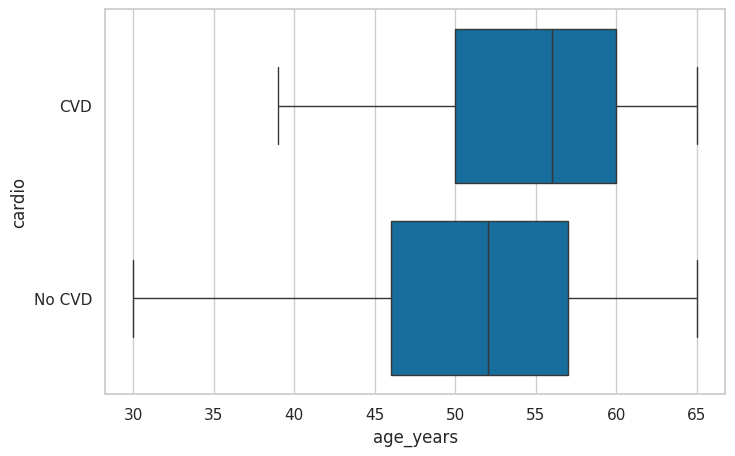

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='cardio', x='age_years',)
plt.show()

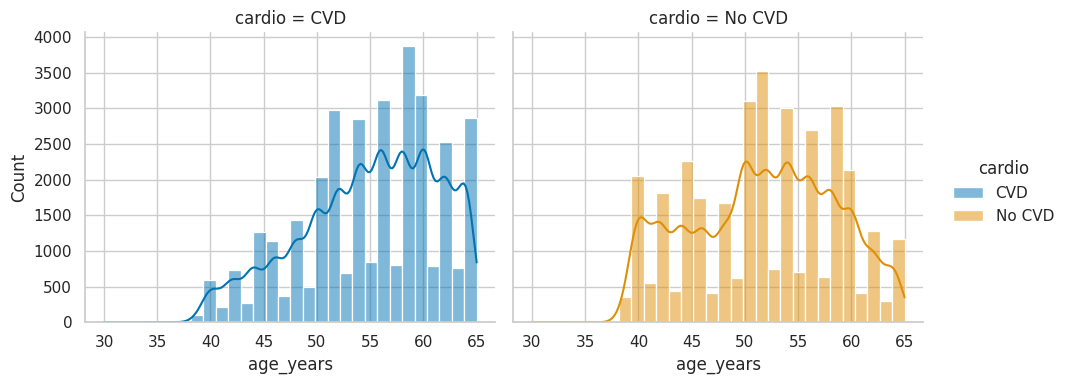

In [28]:
'''Visualize the age distribution for both CVD and No CVD groups'''
sns.displot(
    data=df,
    x="age_years",
    col="cardio",
    hue="cardio",
    bins=30,
    kde=True,
    height=4, aspect=1.2
)
plt.show()

## Hypothesis 2:
>H0: No significant difference in the likelihood of developing CVD between males and females <br>
>H1: Significant difference in the likelihood of developing CVD between genders

In [29]:
from scipy.stats import chi2_contingency

In [30]:
'''Chi-square test'''
def chi2_square_test(var1, var2):
    '''Chi-square test function'''
    contingency_table = pd.crosstab(df[var1], df[var2])
    print("Contingency Table:\n", contingency_table)

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("\nChi-Square Test Results:")
    print(f"Chi2 statistic = {chi2}")
    print(f"Degrees of freedom = {dof}")
    print(f"p-value = {p}")
chi2_square_test('gender', 'cardio')

Contingency Table:
 cardio    CVD  No CVD
gender               
Female  11955   11971
Male    21988   22698

Chi-Square Test Results:
Chi2 statistic = 3.57968306145962
Degrees of freedom = 1
p-value = 0.058490309641719154


Chi square test is used to test the null hypothesis:
>H0: No significant difference in the likelihood of developing CVD between males and females

The p-value of 0.058 is recieved. As 0.058 > 0.05, there is not enough evidence to reject the null hypothesis and H0 is accepted at the 5% significance level.

Conclusion: ***No significant difference in the likelihood of developing CVD between males and females***

### Visualisation

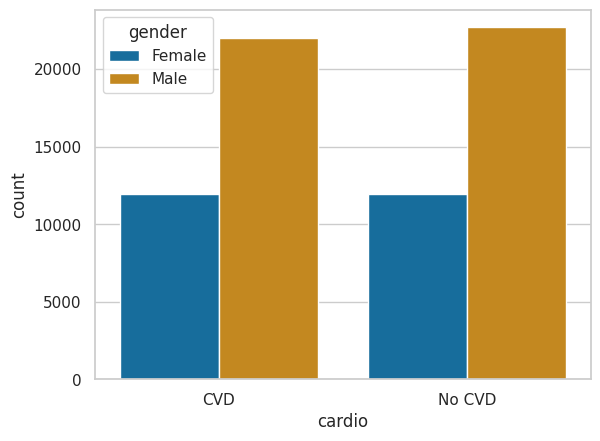

In [31]:
sns.countplot(data=df, x='cardio',hue='gender')
plt.show()

The visualisation shows how male and female distribution are very similar for those with CVD and without CVD

## Hypothesis 3:
>H0: Blood pressure has no correlation with developing CVD <br>
>H1: High blood pressure increases the likelihood of developing CVD

In [32]:
'''Splitting blood pressure data'''
# Systolic BP
hi_cvd = df[df['cardio'] == 'CVD']['ap_hi']
hi_no_cvd = df[df['cardio'] == 'No CVD']['ap_hi']

# Diastolic BP
lo_cvd = df[df['cardio'] == 'CVD']['ap_lo']
lo_no_cvd = df[df['cardio'] == 'No CVD']['ap_lo']


All groups have a p-value much lower than 0.05, normality is rejected at the 5% significance level and non parametric test is needed.

In [33]:
'''Normality test'''
#sys
p_hi_cvd = normality_test(hi_cvd)[1]
p_hi_no_cvd = normality_test(hi_no_cvd)[1]

# Dia
p_lo_cvd = normality_test(lo_cvd)[1]
p_lo_no_cvd = normality_test(lo_no_cvd)[1]

print(f"Systolic BP normality p-values: CVD={p_hi_cvd}, No CVD={p_hi_no_cvd}")
print(f"Diastolic BP normality p-values: CVD={p_lo_cvd}, No CVD={p_lo_no_cvd}")

Systolic BP normality p-values: CVD=2.7908729858652275e-40, No CVD=1.0550031772591162e-55
Diastolic BP normality p-values: CVD=2.2169384952703853e-50, No CVD=3.6683254738619266e-56


In [34]:
'''Mann-Whitney test'''
# Sys
u_hi, p_hi = mannwhitneyu(hi_cvd, hi_no_cvd, alternative='greater')

# Dia
u_lo, p_lo = mannwhitneyu(lo_cvd, lo_no_cvd, alternative='greater')

print("Mann–Whitney U Test Results")
print(f"Systolic BP: U = {u_hi}, p = {p_hi}")
print(f"Diastolic BP: U = {u_lo}, p = {p_lo}")

Mann–Whitney U Test Results
Systolic BP: U = 884063397.5, p = 0.0
Diastolic BP: U = 812828489.0, p = 0.0


Mann-Whitney test is used to test the null hypothesis for both Systolic and Diastolic readings:
>H0: Blood pressure has no correlation with developing CVD

A upper tailed test is used for both tests as H1 mentions "*Higher* blood pressure". 

The resulted p-values are so small that it is rounded to 0.0, as p-value is much smaller than 0.05, H0 is confidently rejected at the 5% significance level and H1 is accepted. 

Conclusion: ***High blood pressure increases the likelihood of developing CVD***

### Visualisation

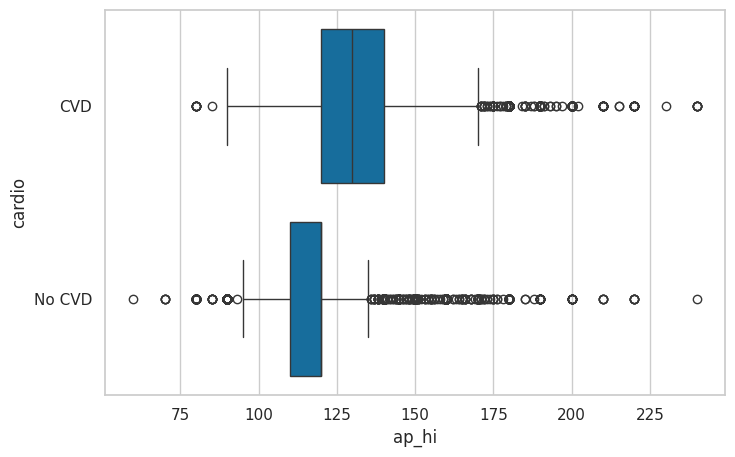

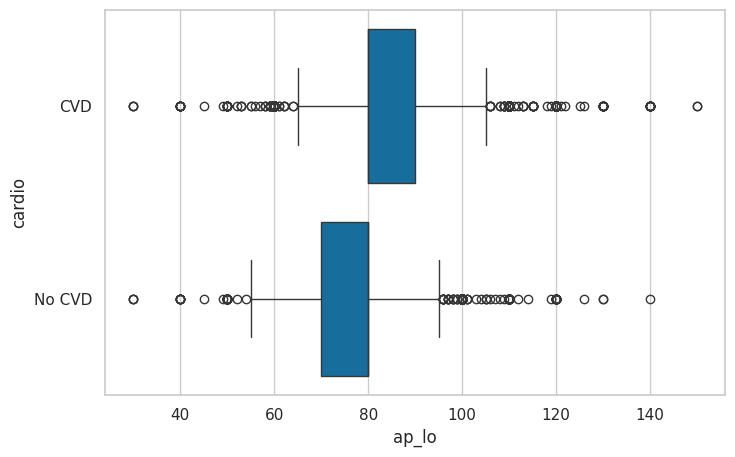

In [35]:
for col in ['ap_hi', 'ap_lo']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y='cardio', x=col,)
    plt.show()

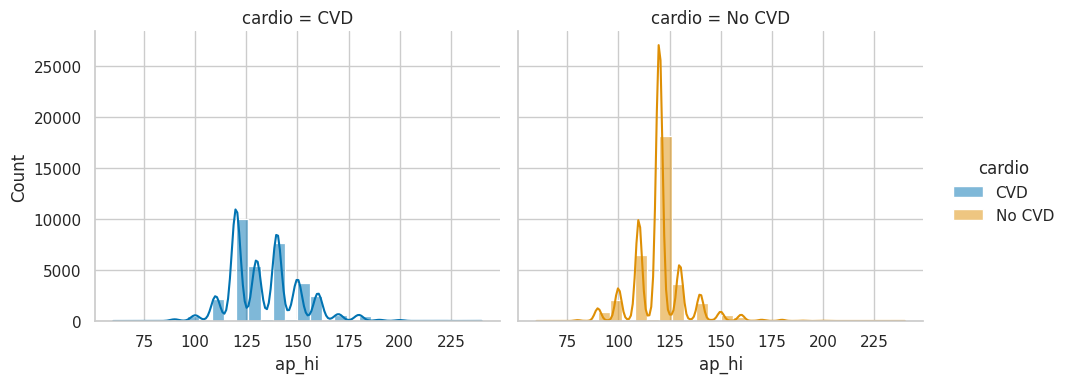

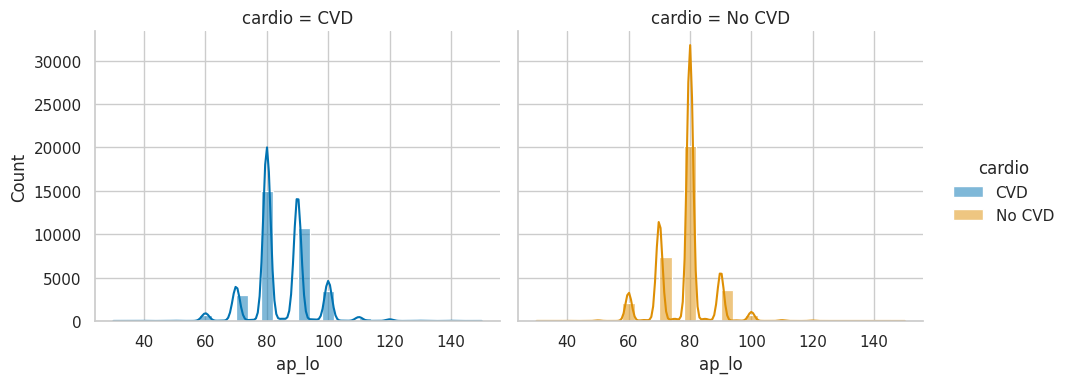

In [36]:
'''Visualize the bp distribution for both CVD and No CVD groups'''
for col in ['ap_hi', 'ap_lo']:
    sns.displot(
        data=df,
        x=col,
        col="cardio",
        hue="cardio",
        bins=30,
        kde=True,
        height=4, aspect=1.2
    )
    plt.show()

## Hypothesis 4:
>H0: No significant correlation between cholesterol level and developing CVD <br>
>H1: High cholesterol individuals are more likely to have CVD

In [37]:
'''Chi-square test'''
chi2_square_test('cholesterol', 'cardio')

Contingency Table:
 cardio         CVD  No CVD
cholesterol               
High          5542    3754
Normal       22403   29048
Very high     5998    1867

Chi-Square Test Results:
Chi2 statistic = 3364.574982312851
Degrees of freedom = 2
p-value = 0.0


Chi square test is used to test the null hypothesis:
>H0: No significant correlation between cholesterol level and developing CVD

The p-value of 0.0 is recieved. As 0.0 is much smaller than 0.05, there is enough evidence to reject the null hypothesis and H1 is accepted at the 5% significance level.

Conclusion: ***High cholesterol individuals are more likely to have CVD***

### Visualisation

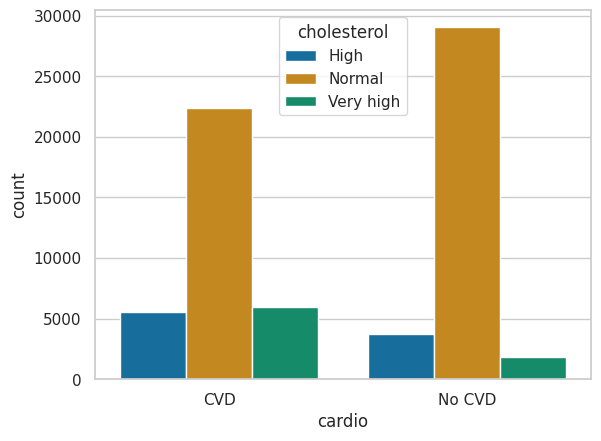

In [38]:
sns.countplot(data=df, x='cardio',hue='cholesterol')
plt.show()

High and Very high levels of cholesterol are more in the CVD group.

## Hypothesis 5:
>H0: No correlation between physical activity and developing CVD<br>
>H1: Physically active individuals are less likely to have CVD

In [39]:
'''chi-square test'''
chi2_square_test('active', 'cardio')

Contingency Table:
 cardio      CVD  No CVD
active                 
Active    26754   28364
Inactive   7189    6305

Chi-Square Test Results:
Chi2 statistic = 97.07910241308448
Degrees of freedom = 1
p-value = 6.661224540118629e-23


Chi square test is used to test the null hypothesis:
>H0: No correlation between physical activity and developing CVD

The p-value of 6.66e-23 is recieved. As p-value is much smaller than 0.05, there is enough evidence to reject the null hypothesis and H1 is accepted at the 5% significance level.

Conclusion: ***Physically active individuals are less likely to have CVD***

### Visualisation

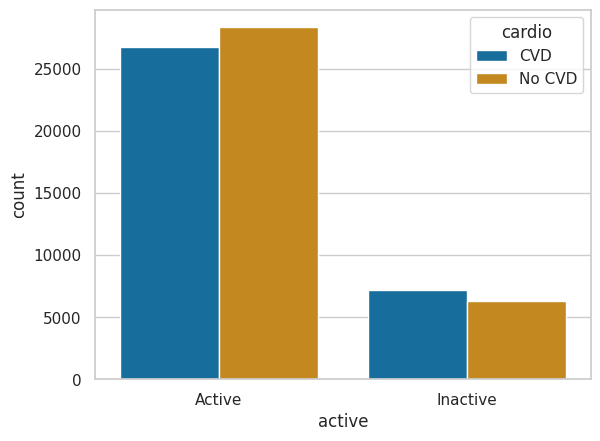

In [40]:
sns.countplot(data=df, x='active',hue='cardio')
plt.show()

The preportion of individuals with CVD is less than half in the active group where as the proportion is more than half in the inactive group.

## Hypothesis 6:
>H0: No correlation between smoking status and developing CVD <br>
>H1: Smoking correlates to developing CVD

In [41]:
'''Chi square test'''
chi2_square_test('smoke', 'cardio')

Contingency Table:
 cardio        CVD  No CVD
smoke                    
Non-smoker  31115   31462
Smoker       2828    3207

Chi-Square Test Results:
Chi2 statistic = 17.931198168779083
Degrees of freedom = 1
p-value = 2.290357635682803e-05


Chi square test is used to test the null hypothesis:
>H0: No correlation between physical activity and developing CVD

The p-value of 2.29e-5 is recieved. As p-value is smaller than 0.05, there is enough evidence to reject the null hypothesis and H1 is accepted at the 5% significance level.

Conclusion: ***Smoking correlates to developing CVD***

### Visualisation

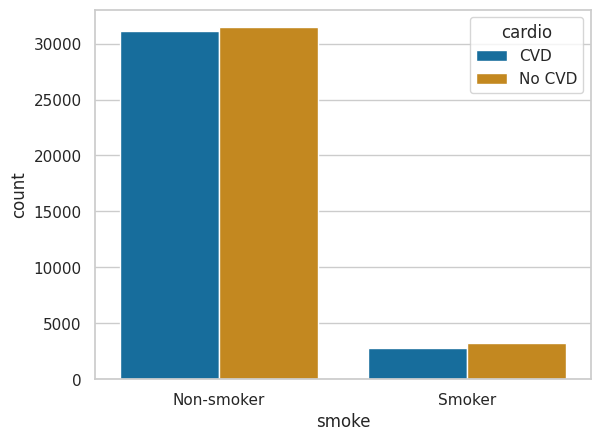

In [42]:
sns.countplot(data=df, x='smoke',hue='cardio')
plt.show()

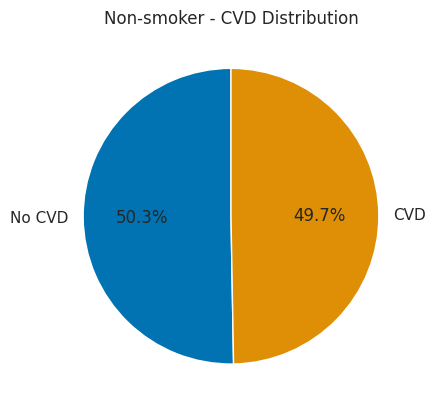

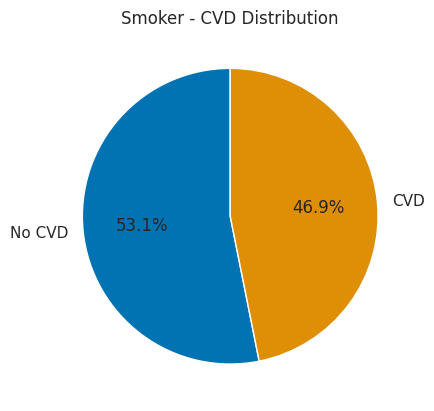

In [43]:
for val in df['smoke'].unique():
    counts = df[df['smoke'] == val]['cardio'].value_counts()
    plt.figure()
    counts.plot.pie(autopct='%1.1f%%', startangle=90, ylabel='')
    plt.title(f'{val} - CVD Distribution')
    plt.show()

Visualisations indicate that smokers have a lower proportion of CVD, which is contrary to the initial hypothesis that smoking increases the likelihood of developing CVD. This could be due to reasons such as selection bias, where the dataset does not represent the general populatiopn evenly. For example, having fewer older smokers in the dataset.



In [44]:
'''Age distribution by smoking status'''
df_smoker_age = df[df['smoke']=='Smoker']['age_years']
df_non_smoker_age = df[df['smoke']=='Non-smoker']['age_years']

In [45]:
'''Normality'''
p_smoker_age = normality_test(df_smoker_age)[1]
p_non_smoker_age = normality_test(df_non_smoker_age)[1]

print(f"Smoker age normality p-value: {p_smoker_age}")
print(f"Non-smoker age normality p-value: {p_non_smoker_age}")

Smoker age normality p-value: 1.2351686626596242e-32
Non-smoker age normality p-value: 4.328012369473215e-34


In [46]:
'''Mann-Whitney'''
u_smoker_age, p_smoker_age = mannwhitneyu(df_smoker_age, df_non_smoker_age, alternative='less')
print("Mann–Whitney Test")
print(f"U-statistic = {u_smoker_age}")
print(f"p-value = {p_smoker_age}")

Mann–Whitney Test
U-statistic = 170590137.0
p-value = 8.574508264664024e-36


A lower tail Mann-whitney test for age compared with smokers and non smokers gives a p-value of 8.57e-36. Much smaller than the 5% significant level, rejecting the null hypothesis:
>H0: Smokers and non-smokers have the same age distribution.

Conclusion ***Smokers have lower age values than non-smokers in the dataset used***

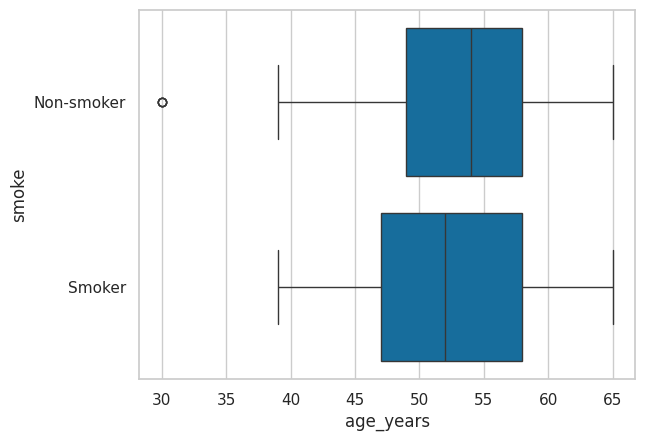

In [47]:

sns.boxplot(data=df, y='smoke', x='age_years',)
plt.show()

A younger distribution of smokers compared to non smokers seen by the younger median value and younger first quartile.

## Hypothesis 7:
>H0: Alcohol consumption has no effect on developing CVD<br>
>H1: Alcohol consumption has significant effect on developing CVD

In [48]:
'''Chi square test'''
chi2_square_test('alco', 'cardio')

Contingency Table:
 cardio         CVD  No CVD
alco                      
Drinker       1745    1914
Non-drinker  32198   32755

Chi-Square Test Results:
Chi2 statistic = 4.825825014755592
Degrees of freedom = 1
p-value = 0.028036444341398778


Chi square test is used to test the null hypothesis:
>H0: Alcohol consumption has no effect on developing CVD

The p-value of 0.028 is recieved. As p-value is smaller than 0.05, there is enough evidence to reject the null hypothesis and H1 is accepted at the 5% significance level.

Conclusion: ***Alcohol consumption has significant effect on developing CVD***

### Visualisation

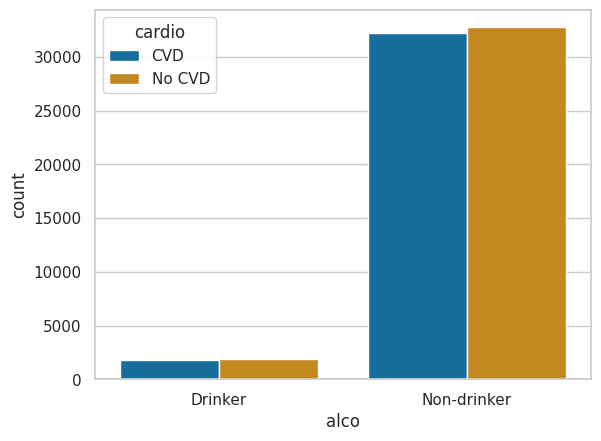

In [49]:
sns.countplot(data=df, x='alco',hue='cardio')
plt.show()

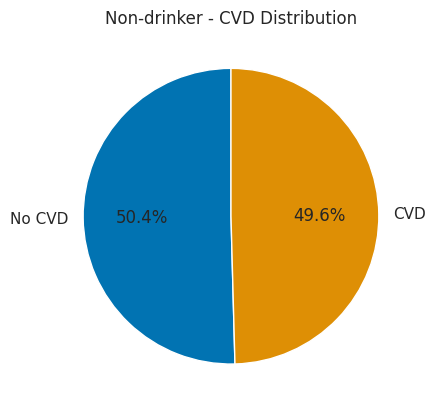

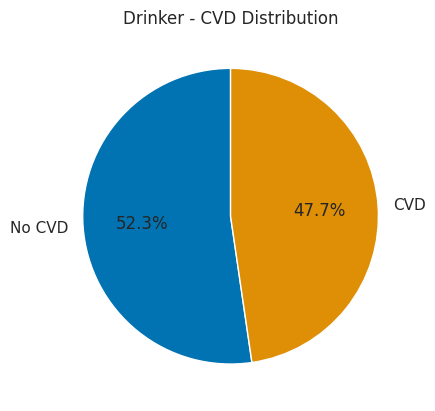

In [50]:
for val in df['alco'].unique():
    counts = df[df['alco'] == val]['cardio'].value_counts()
    plt.figure()
    counts.plot.pie(autopct='%1.1f%%', startangle=90, ylabel='')
    plt.title(f'{val} - CVD Distribution')
    plt.show()

Same patterns as smoker distribution can be see where proportion of CVD for drinkers is acturally less than non drinkers.

In [51]:
'''Split age distribution by alcohol consumption status'''
df_alco_age = df[df['alco']=='Drinker']['age_years']
df_non_alco_age = df[df['alco']=='Non-drinker']['age_years']

In [52]:
'''Normality'''
stat_alco, p_alco_age = shapiro(df_alco_age) # No sampling for sample size < 5000

p_non_alco_age = normality_test(df_non_alco_age)[1]
print(f"Drinker age normality p-value: {p_alco_age}")
print(f"Non-drinker age normality p-value: {p_non_alco_age}")

Drinker age normality p-value: 3.877591808449404e-28
Non-drinker age normality p-value: 1.3603249940902447e-33


In [53]:
'''Mann-Whitney'''
u_alco_age, p_alco_age = mannwhitneyu(df_alco_age, df_non_alco_age, alternative='less')
print("Mann–Whitney Test")
print(f"U-statistic = {u_alco_age}")
print(f"p-value = {p_alco_age}")

Mann–Whitney Test
U-statistic = 110012008.0
p-value = 1.724930123392766e-14


A lower tail Mann-whitney test for age compared with drinkers and non drinkers gives a p-value of 1.72e-14. Much smaller than the 5% significant level, rejecting the null hypothesis:
>H0: drinkers and non-drinkers have the same age distribution.

Conclusion ***drinkers have lower age values than non-drinkers in the dataset used***

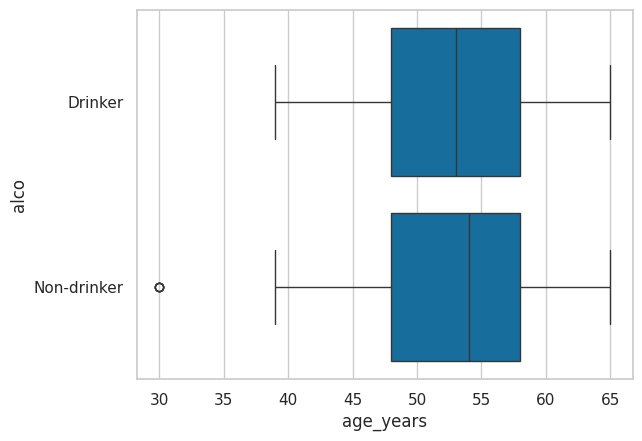

In [54]:
sns.boxplot(data=df, y='alco', x='age_years',)
plt.show()

A younger drinker distribution shown by the younger median value.

---

# Conclusion
The following insights can be drawn:
1. Older individuals are more likely to have CVD
2. No significant difference in the likelihood of developing CVD between males and females
3. High blood pressure increases the likelihood of developing CVD
4. High cholesterol individuals are more likely to have CVD
5. Physically active individuals are less likely to have CVD

Smokers and drinkers in the dataset were statistically significantly younger than non-smokers and non-drinkers. This suggests possible bias, where younger individuals are more represented in these groups. As age is a major confounder for CVD, this may explain why smoking and alcohol consumption appeared negatively correlated with CVD in the initial analysis.